In [5]:
import matplotlib.pyplot as plt
import itertools
import functools
import statistics
import math

plt.rc('image', cmap='viridis')
plt.style.use('ggplot')


def Input(day):
    "Open input file for the day"
    file = '2021/input{0}.txt'.format(day)
    return open(file)

## Day 5

In [2]:
def build_map(lines, diagonal=False):
    map = [[0]*1000 for _ in range(1000)]

    for start, end in lines:
        if start[0] == end[0]:
            x = start[0]
            increment = -1 if start[1] > end[1] else 1
            for y in range(start[1], end[1] + increment, increment):
                map[x][y] += 1
        elif start[1] == end[1]:
            y = start[1]
            increment = -1 if start[0] > end[0] else 1
            for x in range(start[0], end[0] + increment, increment):
                map[x][y] += 1
        elif diagonal:
            x_increment = -1 if start[0] > end[0] else 1
            y_increment = -1 if start[1] > end[1] else 1
            y = start[1]
            for x in range(start[0], end[0] + x_increment, x_increment):
                map[x][y] += 1
                y += y_increment
    return map


def part_one(lines):
    points = [point for line in build_map(lines) for point in line]
    return len(list(filter(lambda x: x >= 2, points)))


def part_two(lines):
    sea_map = build_map(lines, True)
    points = [point for line in sea_map for point in line]
    
    return len(list(filter(lambda x: x >= 2, points)))


with Input(5) as f:
    lines = [tuple(tuple(map(int, x.split(',')))
                   for x in line.split('->')) for line in f]
    res = part_one(lines)
    print(res)
    res = part_two(lines)
    print(res)


6113
20373


## Day 6

372300
1675781200288


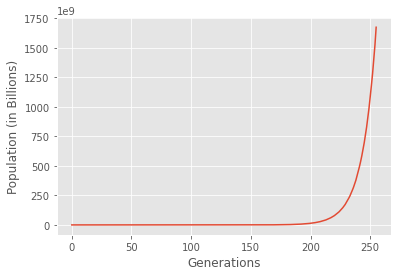

In [3]:
def next(state):
  next_state = {}
  for age, n in state.items():
    if age > 0:
      next_state[age-1] = n + next_state[age-1] if age-1 in next_state else n
    else:
      next_state[6] = n + next_state[6] if 6 in next_state else n
      next_state[8] = n

  return next_state

def condense(state):
  return { k: len(list(v)) for k,v in itertools.groupby(sorted(state)) }

with Input(6) as f:
  state = condense(list(map(int, f.readline().split(','))))
  totals = []
  for i in range(256):
    state = next(state)
    totals.append(sum(state.values()))
  print(totals[79])
  print(totals[255])

  fig, ax = plt.subplots()

  plt.ylabel('Population (in Billions)')
  plt.xlabel('Generations')
  ax.ticklabel_format(axis='y',scilimits=(9,9))
  ax.plot(totals)

  plt.show()

## Day 7

340056


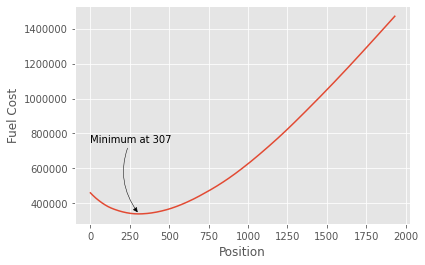

In [59]:
def align_to(position):
    return lambda x: abs(x - position)


96233485


def align_factorial(position):
    return lambda x: sum(range(0, abs(x-position)+1))


with Input(7) as f:
    positions = list(map(int, f.readline().split(',')))
    median = statistics.median(positions)

    low = min(positions)
    high = max(positions)

    costs = []
    for i in range(low, high+1):
        cost = align_to(i)
        costs.append(sum([cost(n) for n in positions]))

    min_cost = min(costs)
    min_pos = costs.index(min(costs))
    print(min(costs))

    fig, ax = plt.subplots()

    plt.ylabel('Fuel Cost')
    plt.xlabel('Position')
    ax.ticklabel_format(style='plain')
    ax.annotate(
        "Minimum at {}".format(min_pos),
        xy=(min_pos, min_cost),
        xytext=(0, 750000),
        arrowprops=dict(ec='black', fc='black', arrowstyle="-|>", connectionstyle="arc3,rad=0.3"),
    )
    ax.plot(costs)

    plt.show()

    # costs = []
    # for i in range(low, high+1):
    #     cost = align_factorial(i)
    #     costs.append(sum([cost(n) for n in positions]))

    # print(min(costs))
